In [1]:
#!pip install c:/Users/ekontogeorgakos/Downloads/pydotplus-2.0.2.tar.gz

In [2]:
import pydotplus

In [3]:
%matplotlib inline
import pandas as pd
import pyodbc
import sqlalchemy
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\ekontogeorgakos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
#import os

#os.environ["PATH"] += os.pathsep + 'c:/users/ekontogeorgakos/appdata/local/continuum/anaconda3/lib/site-packages/graphviz'


In [5]:
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=e1001spss1;DATABASE=datamining_temp;UID=datamining_u;PWD=data123')

In [6]:
query = """
    SELECT 
    *
    from
	  pyt.BalancedDataset """

In [7]:
df = pd.pandas.read_sql_query(query, conn)#,chunksize = 10000 )

In [8]:
df['Target_Flag'].value_counts()

F    9480
T     474
Name: Target_Flag, dtype: int64

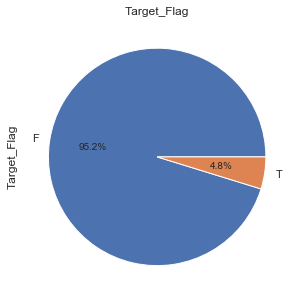

In [9]:
df['Target_Flag'].value_counts().plot(kind = 'pie',y = 'Target_Flag',figsize=(5, 5),title = 'Target_Flag',autopct='%1.1f%%')

In [10]:
df = df[df.columns[1:-3]]

In [11]:
df.describe()

,Total_Funds_Balances,Total_Deposits_Balances,Total_Loans_Balances,Bucket_Months_12M,Age,POS_1Y_Balance,Checks_Issued_Last_1Y_Num,Checks_Issued_Last_1Y_Amount,Checks_Issued_Last_1Y_DaysSince,Remmitances_Out_GR_1Y_Num,...,Home_Loans,Personal_loans,Business_loans_Short_Term,Business_loans_Long_Term,Credit_Cards,Debit_Cards_Prepaid_Cards,POS,Other_SB_Services,Digital_Banking,Fee_based_Services
count,9.954000e+03,9.954000e+03,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,...,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000
mean,9.150673e+03,7.695647e+03,3768.397348,0.702230,48.988346,322.593270,0.041591,793.467540,2.957505,0.700422,...,0.053546,0.077255,0.008539,0.001105,0.103677,0.379546,0.014266,0.015773,0.275467,0.058168
std,3.670039e+04,3.227327e+04,21461.798863,2.556454,20.093674,5447.215715,0.485371,11993.631085,26.850287,6.476528,...,0.225132,0.267010,0.092017,0.033226,0.304856,0.485298,0.118590,0.124601,0.446772,0.234072
min,-1.394000e+03,-1.394000e+03,-4410.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.766250e+01,2.663000e+01,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.042550e+02,2.554500e+02,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.699822e+03,2.154760e+03,0.000000,0.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.413185e+06,1.413185e+06,806333.770000,12.000000,100.000000,238963.780000,19.000000,369499.580000,360.000000,428.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
x = df[df.columns[:-1]]
y = df[df.columns[-1:]]

In [13]:
x = x.drop(columns=['General_Insurances','New_CSI','EBanking_Transaction_Segment','Age_Band'])

In [14]:
for col in x.columns:
    if '_LastDate' in col:
        x = x.drop(columns = [col])
    else:        
        if x[col].dtypes=='object':
            x = pd.get_dummies(x, prefix=col + '_', columns=[col])
    
    

In [15]:
def recode(y):
    if y== 'T':
        ret = 1
    else: 
        ret = 0    
    return ret   
    

In [16]:
y['Target_Flag'] = y['Target_Flag'].apply(lambda x : recode(x))


C:\Users\ekontogeorgakos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
y = np.ravel(y)

In [18]:
DT = DecisionTreeClassifier(class_weight = 'balanced',min_samples_split=100,max_depth = 5)

In [19]:
DT.fit(x,y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
print(classification_report(y,  DT.predict(x)))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      9480
           1       0.17      0.86      0.28       474

    accuracy                           0.79      9954
   macro avg       0.58      0.83      0.58      9954
weighted avg       0.95      0.79      0.85      9954



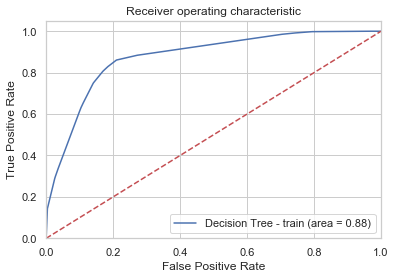

In [21]:
logit_roc_auc = roc_auc_score(y, DT.predict(x))
fpr, tpr, thresholds = roc_curve(y, DT.predict_proba(x)[:,1])
auc_train = roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='Decision Tree - train (area = %0.2f)' % auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [22]:
dot_data = StringIO()

In [23]:
export_graphviz(DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=x.columns)
 


In [24]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

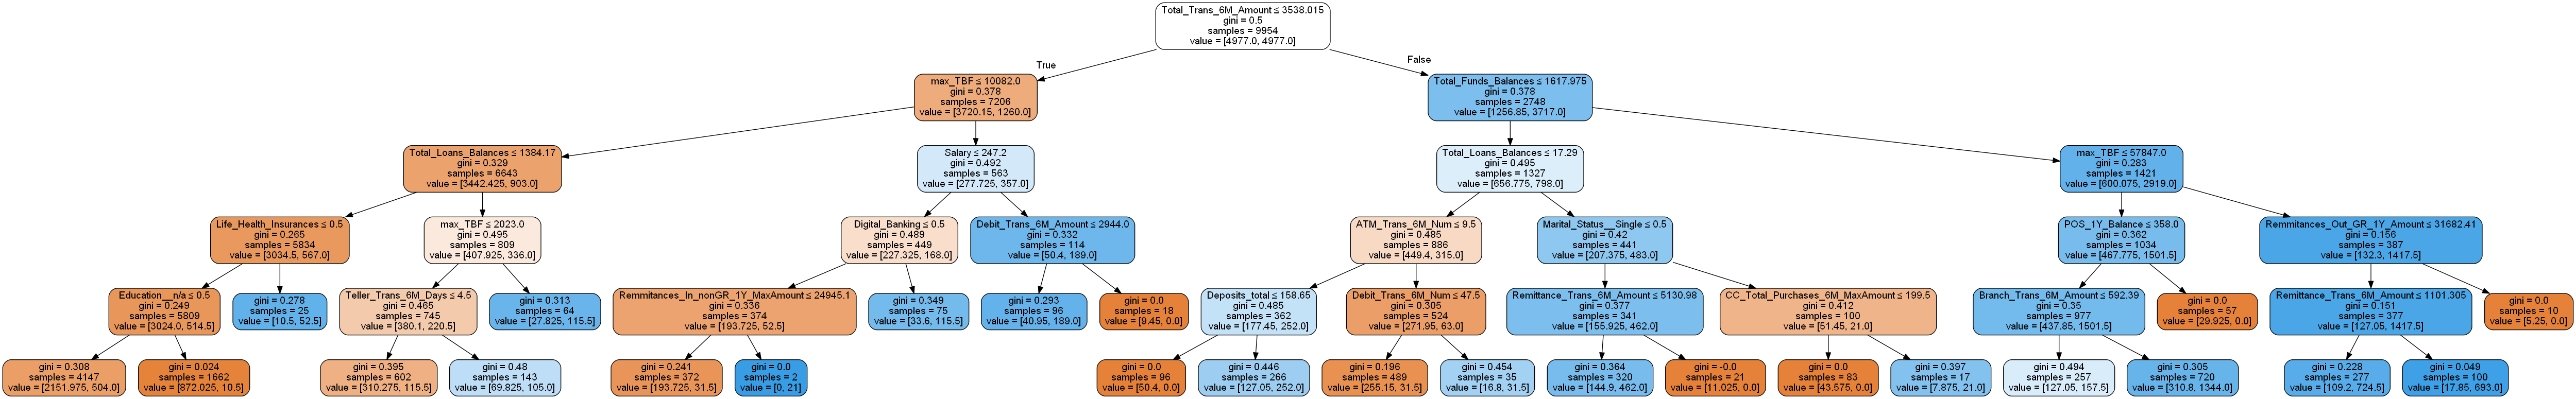

In [25]:
Image(graph.create_png())